# <u>**Part 6**


In [ ]:
import numpy as np
import pandas as pd
import random

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy.linalg import norm
from sklearn.cluster import KMeans

In [ ]:
np.random.seed(42)
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

X_train, X_test, y_train, y_test = train_test_split(data, target)

### **Exercise 51**


Using the RandomForestClassifier class from the scikit-learn package, create a classification model (set  random_state=42). Train the model on the train set and evaluate on the test set.

In response, print the model accuracy (up to four decimal places)

In [ ]:
print(np.info(X_train))
print('')
print(np.info(X_test))
print('')
print(np.info(y_train))
print('')
print(np.info(y_test))

class:  ndarray
shape:  (1500, 2)
strides:  (16, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x482d750
byteorder:  little
byteswap:  False
type: float64
None

class:  ndarray
shape:  (500, 2)
strides:  (16, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x4833520
byteorder:  little
byteswap:  False
type: float64
None

class:  ndarray
shape:  (1500,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x4835470
byteorder:  little
byteswap:  False
type: int64
None

class:  ndarray
shape:  (500,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x4838360
byteorder:  little
byteswap:  False
type: int64
None


In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 0.99493223 -0.54234278]
 [ 2.08477012  0.50577438]
 [-0.02827738  0.8262124 ]
 ...
 [-1.11009121  0.07349388]
 [ 0.27484416 -0.63890836]
 [ 1.11939185  1.12425355]]
[[ 1.25343731e+00 -6.60162753e-01]
 [ 1.18487984e+00 -3.91577377e-01]
 [-7.18374344e-01  1.01315381e+00]
 [ 1.57820460e+00 -2.50141286e-01]
 [ 7.57464469e-01  7.51270752e-04]
 [ 1.71517293e+00 -5.10309778e-02]
 [ 6.60119949e-01  8.18399627e-01]
 [ 7.58797757e-01  4.97786635e-01]
 [ 1.88300722e+00  1.78118151e-01]
 [ 1.47497697e+00 -9.47587506e-01]
 [ 3.30756615e-02 -4.70103135e-01]
 [-8.22915831e-01  5.17839191e-01]
 [ 1.04544649e+00 -1.24742882e-01]
 [-1.29603134e+00  2.98783944e-01]
 [ 1.21967057e+00 -6.80787569e-01]
 [ 2.06792658e+00  1.95959323e-01]
 [ 9.65492733e-01  6.99428071e-01]
 [ 1.60974912e-01  5.12734204e-02]
 [ 9.71116262e-01 -3.14201716e-01]
 [ 1.04623694e+00 -7.42800610e-01]
 [ 4.06344491e-01  1.05626522e+00]
 [ 6.93665403e-01 -6.95816981e-01]
 [ 1.87807933e+00 -3.27514633e-01]
 [ 7.21383953e-01  6.251198

In [ ]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)
acc = classifier.score(X_test, y_test)
print(f'Accuracy: {acc:.4f}')

Accuracy: 0.9300


### **Exercise 52**

Using the RandomForestClassifier class and grid search method (*GridSearchCV* class - set ```scoring='accuracy'```, ```cv=2```) find the optimal values of ```criterion```, ```max_depth``` and ```min_samples_leaf``` parameters. Search for parameter values from the following:

* for ```criterion``` -> ```['gini', 'entropy']```
* for ```max_depth``` -> ```[6, 7, 8]```
* for ```min_samples_leaf``` -> ```[4, 5]```

Train the model on the train set and evaluate on the test set.

In response, print the optimal values of ```criterion```, ```max_depth``` and ```min_samples_leaf``` parameters to the console.

In [ ]:
classifier = RandomForestClassifier(random_state=42)
 
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [6, 7, 8],
    'min_samples_leaf': [4, 5]
}
 
grid_search = GridSearchCV(
    classifier, 
    param_grid=param_grid, 
    n_jobs=-1, 
    scoring='accuracy', 
    cv=2
)
grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4}


### **Exercise 53**

The following list with text documents is given

```
documents = [
    'python is a programming language',
    'python is popular',
    'programming in python',
    'object-oriented programming in python'
]
```

Vectorize your documents with the CountVectorizer class from the scikit-learn.
In response, print the result as a DataFrame.



In [ ]:
documents = [
    'python is a programming language',
    'python is popular',
    'programming in python',
    'object-oriented programming in python'
]

In [ ]:
vectorizer = CountVectorizer()
 
df = pd.DataFrame(data=vectorizer.fit_transform(documents).toarray(), 
                  columns=vectorizer.get_feature_names_out())
print(df)

   in  is  language  object  oriented  popular  programming  python
0   0   1         1       0         0        0            1       1
1   0   1         0       0         0        1            0       1
2   1   0         0       0         0        0            1       1
3   1   0         0       1         1        0            1       1


### **Exercise 54**

Vectorize your documents with the *CountVectorizer* class from the *scikit-learn*. Use the ```stop_words``` argument and set its value to ```'english'```.

In response, print the result as a DataFrame.

In [ ]:
vectorizer = CountVectorizer(stop_words='english')

In [ ]:
df = pd.DataFrame(data=vectorizer.fit_transform(documents).toarray(), 
                  columns=vectorizer.get_feature_names_out())
print(df)

   language  object  oriented  popular  programming  python
0         1       0         0        0            1       1
1         0       0         0        1            0       1
2         0       0         0        0            1       1
3         0       1         1        0            1       1


### **Exercise 55**

Vectorize your documents with the CountVectorizer class from the scikit-learn. Use the stop_words argument and set its value to 'english'. Also set the appropriate argument that allows you to extract n-grams: unigrams and bigrams.


In [ ]:
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
 
df = pd.DataFrame(data=vectorizer.fit_transform(documents).toarray(), 
                  columns=vectorizer.get_feature_names_out())
print(df)

   language  object  object oriented  oriented  oriented programming  popular  \
0         1       0                0         0                     0        0   
1         0       0                0         0                     0        1   
2         0       0                0         0                     0        0   
3         0       1                1         1                     1        0   

   programming  programming language  programming python  python  \
0            1                     1                   0       1   
1            0                     0                   0       1   
2            1                     0                   1       1   
3            1                     0                   1       1   

   python popular  python programming  
0               0                   1  
1               1                   0  
2               0                   0  
3               0                   0  


### **Exercise 56**

Vectorize the given documents using the *TfidfVectorizer* class from the scikit-learn.

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
 
df = pd.DataFrame(
    data=tfidf_vectorizer.fit_transform(documents).toarray(), 
    columns=tfidf_vectorizer.get_feature_names_out()
)
print(df)

         in        is  language    object  oriented   popular  programming  \
0  0.000000  0.519714  0.659191  0.000000  0.000000  0.000000     0.420753   
1  0.000000  0.572892  0.000000  0.000000  0.000000  0.726641     0.000000   
2  0.691131  0.000000  0.000000  0.000000  0.000000  0.000000     0.559530   
3  0.433919  0.000000  0.000000  0.550372  0.550372  0.000000     0.351295   

     python  
0  0.343993  
1  0.379192  
2  0.457453  
3  0.287207  


### **Exercise 57**

Vectorize the given documents using the *TfidfVectorizer* class from the scikit-learn. Using the stop_words argument remove two words from the vectorization: ```'is'``` and ```'in'```.



In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words=['is', 'in'])
 
df = pd.DataFrame(
    data=tfidf_vectorizer.fit_transform(documents).toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)
print(df)

   language    object  oriented   popular  programming    python
0  0.771579  0.000000  0.000000  0.000000     0.492489  0.402642
1  0.000000  0.000000  0.000000  0.886548     0.000000  0.462637
2  0.000000  0.000000  0.000000  0.000000     0.774191  0.632952
3  0.000000  0.610878  0.610878  0.000000     0.389916  0.318782


### **Exercise 58**

Load the *58.csv* file into the DataFrame

Then, implement the K-Means algorithm to split the given data into two clusters. Specify the centroid of each cluster and print its coordinates to the console. Round the result to three decimal places for each coordinate.

Steps:

1. determine the ranges of values for the variables x1 and x2
2. randomly select the centroid from the calculated intervals
3. assign points to the nearest centroid
4. calculate new centroid (as the arithmetic mean of the coordinates of the points in one cluster)
5. go back to step 3 and repeat until converge (10 iterations is enough)

In [ ]:
df = pd.read_csv('58.csv')
 
x1_min = df.x1.min()
x1_max = df.x1.max()
 
x2_min = df.x2.min()
x2_max = df.x2.max()
 
centroid_1 = np.array([
    random.uniform(x1_min, x1_max), 
    random.uniform(x2_min, x2_max)
])
centroid_2 = np.array([
    random.uniform(x1_min, x1_max), 
    random.uniform(x2_min, x2_max)
])
 
data = df.values
 
for i in range(10):
    clusters = []
    for point in data:
        centroid_1_dist = norm(centroid_1 - point)
        centroid_2_dist = norm(centroid_2 - point)
        cluster = 1
        if centroid_1_dist > centroid_2_dist:
            cluster = 2
        clusters.append(cluster)
 
    df['cluster'] = clusters
 
    centroid_1 = [
        round(df[df.cluster == 1].x1.mean(), 3), 
        round(df[df.cluster == 1].x2.mean(), 3)
    ]
    centroid_2 = [
        round(df[df.cluster == 2].x1.mean(), 3), 
        round(df[df.cluster == 2].x2.mean(), 3)
    ]
 
print(centroid_1)
print(centroid_2)

[2.663, -3.083]
[0.352, 2.502]


### **Exercise 59**

Load the 59.csv file into the DataFrame. The file contains two variables x1 and x2. The distribution of the variables is as follows:


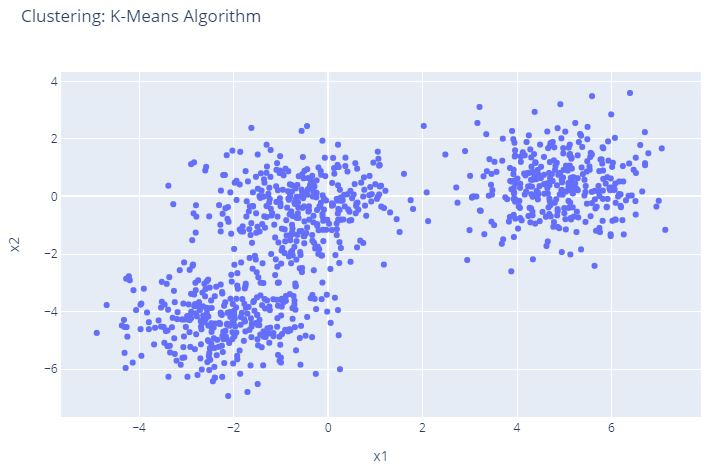

Using the KMeans class from the scikit-learn, split the data into three clusters. Set arguments:

* ```max_iter=1000```
* ```random_state=42```

In response, print the coordinates of the centroid of each cluster

In [ ]:
df = pd.read_csv('59.csv')

kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=42)
kmeans.fit(df)
 
print(kmeans.cluster_centers_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[-0.55537629 -0.32971364]
 [ 4.86661316  0.42352176]
 [-2.15656147 -4.30478556]]


### **Exercise 60**

Using the *KMeans* class from the scikit-learn, the model was created. Make a prediction based on this model (kmeans) and assign a cluster number to each sample in the df DataFrame as 'y_kmeans' column.




In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=42)
kmeans.fit(df)
 
y_kmeans = kmeans.predict(df)
df['y_kmeans'] = y_kmeans
print(df.head(10))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         x1        x2  y_kmeans
0 -2.776333 -4.166641         2
1 -1.335879 -1.083934         0
2  6.507272 -0.158773         1
3 -0.956622  0.235036         0
4 -1.558383 -3.969630         2
5 -0.652304 -1.332604         0
6  5.560753  1.517069         1
7 -0.891052 -3.455786         2
8  6.391479  3.597473         1
9  5.812508 -0.845526         1
